In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [32]:
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [33]:
y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index]);
    plt.xlabel(classes[y[index]]);

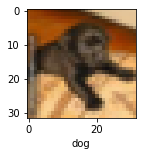

In [35]:
plot_sample(X_train,y_train,56)

In [36]:
X_train = X_train/255.0
X_test = X_test/255.0

In [37]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8128 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6242 - accuracy: 0.4250
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5395 - accuracy: 0.4593
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4814 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4326 - accuracy: 0.4966


In [38]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.51      0.54      1000
           1       0.72      0.43      0.54      1000
           2       0.48      0.17      0.25      1000
           3       0.31      0.38      0.34      1000
           4       0.42      0.36      0.39      1000
           5       0.51      0.20      0.28      1000
           6       0.32      0.83      0.46      1000
           7       0.49      0.61      0.54      1000
           8       0.62      0.61      0.62      1000
           9       0.62      0.50      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [55]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [56]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5014 - accuracy: 0.4604
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1437 - accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0234 - accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9373 - accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8788 - accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8254 - accuracy: 0.7144
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7798 - accuracy: 0.7305
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7405 - accuracy: 0.7442
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7005 - accuracy: 0.7578
Epoch 10/10
1563/1563 [==============================] - 22s 14m

In [57]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9158 - accuracy: 0.6953


[0.9157698154449463, 0.6952999830245972]

In [58]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

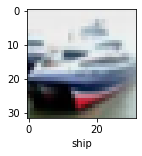

In [60]:
plot_sample(X_test, y_test,1)

In [62]:
classes[y_classes[1]]

'ship'

In [63]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.79      0.73      1000
           1       0.75      0.85      0.80      1000
           2       0.64      0.53      0.58      1000
           3       0.55      0.51      0.53      1000
           4       0.66      0.63      0.64      1000
           5       0.63      0.63      0.63      1000
           6       0.68      0.82      0.75      1000
           7       0.80      0.69      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

